In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# MAGIC COMMAND
% matplotlib inline
fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.shape

(59, 7)

In [6]:
features = fruits.columns[-4:].tolist()  # Return the array as a list

In [7]:
features

['mass', 'width', 'height', 'color_score']

In [8]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
# Creating a tuple to know the unique tipe label and fruit
# zip() makes an iterator that aggregates elements from each of the iterables.
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

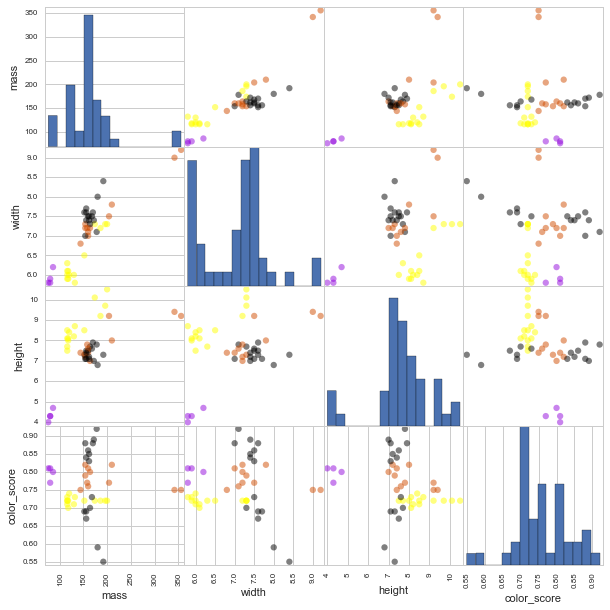

In [9]:
# Examining the data
# plotting a scatter matrix
# importing colour map
from matplotlib import cm

X = fruits[features]
y = fruits['fruit_label']

# train_test_split() splits arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

In [10]:
X_train.shape

(44, 4)

In [11]:
X_test.shape

(15, 4)

In [12]:
y_train.shape

(44,)

In [13]:
y_test.shape

(15,)

In [14]:
df_train = pd.concat([X_train,y_train],axis=1)

In [15]:
df_train.head()

,mass,width,height,color_score,fruit_label
42,154,7.2,7.2,0.82,3
48,174,7.3,10.1,0.72,4
7,76,5.8,4.0,0.81,2
14,152,7.6,7.3,0.69,1
32,164,7.2,7.0,0.80,3


In [16]:
df_train.shape

(44, 5)

In [17]:
df_train['width'].max()

9.1999999999999993

In [18]:
df_train['width'].min()

5.7999999999999998

In [19]:
def corrfunc(x,y,**kws):
    (r,p) = sps.pearsonr(x,y)
    ax = plt.gca()
    ax.annotate("r={:.2f}".format(r),
               xy=(.1,.9), xycoords=ax.transAxes)

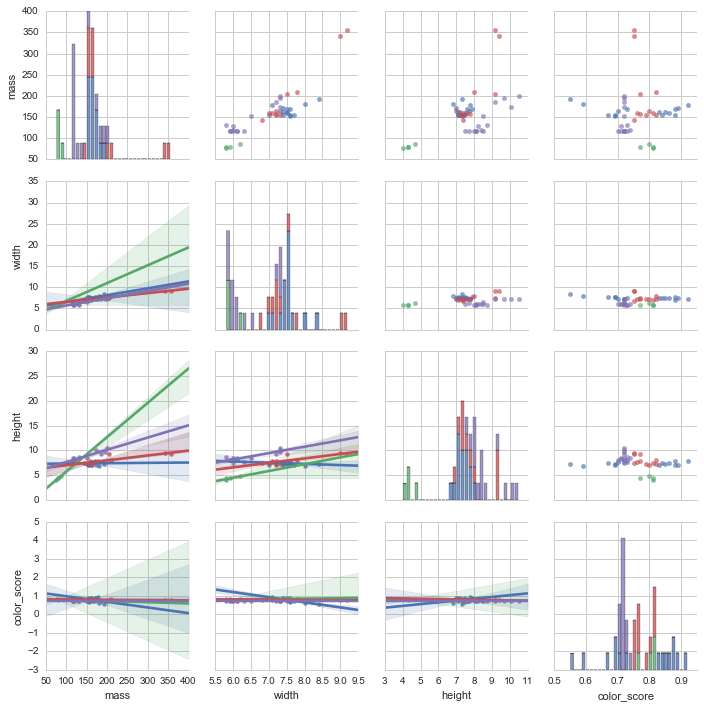

In [24]:
# Other way to generate the same type of plot
fig = sns.PairGrid(df_train, hue='fruit_label', vars=features)
fig = fig.map_diag(plt.hist, bins=30, alpha=0.75)
fig = fig.map_upper(plt.scatter, alpha=0.65)
fig = fig.map_lower(sns.regplot)
fig = fig.add_legend

In [25]:
df_train['mass'].max()

356

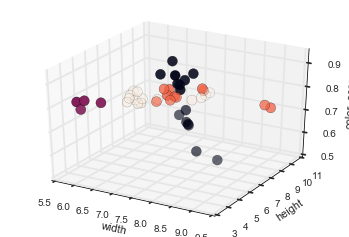

In [26]:
# plotting a 3D scatter plot
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
from mpl_toolkits.mplot3d import Axes3D

figthree = plt.figure()
ax = figthree.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [27]:
# CREATING TRAIN-TEST SPLIT

In [28]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
# If we want to keep the same split the value of 'random_state' should be kept the same
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [30]:
X_train.shape

(44, 3)

In [31]:
X_test

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6
2,176,7.4,7.2
34,142,7.6,7.8
46,216,7.3,10.2
40,154,7.1,7.5
22,140,7.3,7.1


In [32]:
fruits.shape

(59, 7)

In [33]:
X_test.shape

(15, 3)

In [34]:
# CREATE CLASSIFIER OBJECT KNN
# 1. Find the most similar instances (X_NN) to x_test that are in X_train
# 2. Get the label y_NN for the instances in X_NN
# 3. Predict the label for X_test by combining the labels y_NN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# instance of the classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
# TRAIN THE CLASSIFIER (fit the estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
# Estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.53333333333333333

In [40]:
X_test.head()

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [41]:
# Checking prediction
predict = knn.predict(X_test)   # KNN.PREDICT on X_TEST

In [42]:
predict

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4])

In [43]:
from sklearn.metrics import accuracy_score
# evaluate accuracy
print(accuracy_score(y_test, predict))

0.533333333333


In [44]:
# USE THE TRAINED k-NN CLASSIFIER MODEL TO CLASSIFY NEW, PREVIOUSLY UNSEEN OBJECTS
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm, and 0.92 colore
example_case = [[20, 4.3, 5.5]]

In [45]:
X_train.shape

(44, 3)

In [46]:
fruit_prediction = knn.predict(example_case)   # KNN.PREDICT() on example_case

In [47]:
fruit_prediction[0]

2

In [48]:
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [49]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])

In [50]:
fruit_prediction

array([4])

In [51]:
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [52]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    if isinstance(X, (pd.DataFrame,)):
        X_mat = X[['height', 'width']].as_matrix()
        y_mat = y.as_matrix()
    elif isinstance(X, (np.ndarray,)):
        # When X was scaled is already a matrix
        X_mat = X_mat[:, :2]
        y_mat = y.as_matrix()
        print(X_mat)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    plt.show()

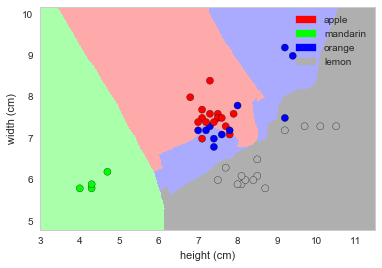

In [53]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

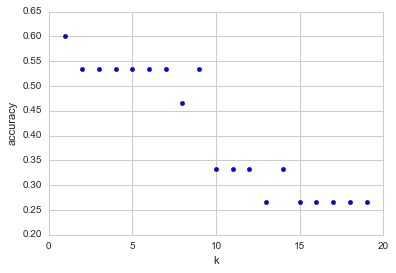

In [54]:
# HOW SENSITIVE IS KNN CLASSIFICATION ACCURACY TO THE CHOICE OF THE 'K' PARAMETER?

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k) # instance of the classifier
    knn.fit(X_train, y_train)  # fit the estimator using training set (train classifier)
    scores.append(knn.score(X_test, y_test)) # estimate the accuracy of the classifier 
                                            # using the test data
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);



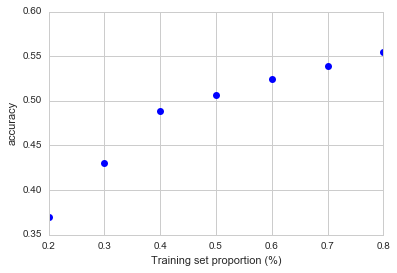

In [70]:
# HOW SENSITIVE IS THE KNN CLASSIFICATION ACCURACY TO THE TRAIN/TEST SPLIT PROPORTION?

train_proportion = [0.8,0.7,0.6,0.5,0.4,0.3,0.2]
knn = KNeighborsClassifier(n_neighbors = 5)   # instance of the classifier
plt.figure()

for s in train_proportion:
    scores = []
    for i in range(1,1000):
        Xn_train, Xn_test, yn_train, yn_test = train_test_split(X,y, test_size = 1-s)
        knn.fit(Xn_train, yn_train)  # fit the estimator using training set (train classifier)
        scores.append(knn.score(Xn_test, yn_test)) # estimate the accuracy of the classifier
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# By default test_size = 0.25

In [68]:
len(scores)   # how many values are in 'scores' vector 

999

In [72]:
# WITH DIFFERENT METRIC 
knn_2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
predict_2 = knn_2.predict(X_test)
predict_2
# evaluate accuracy
#print(accuracy_score(y_test, predict))

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4])

In [77]:
predict

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4])

In [78]:
# Changing the metric the KNN prediction is the same. So also the accuracy:

In [79]:
# evaluate accuracy
print(accuracy_score(y_test, predict_2))

0.533333333333
